In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import pandas as pd
import time

# Retrieve the data from CSVs

In [9]:
X_train = pd.read_csv('data/X_train.csv')
Y_train = pd.read_csv('data/Y_train.csv')
X_test = pd.read_csv('data/X_test.csv')
Y_test = pd.read_csv('data/Y_test.csv')

X_train_small = pd.read_csv('data/X_train_small.csv')
Y_train_small = pd.read_csv('data/Y_train_small.csv')
X_test_small = pd.read_csv('data/X_test_small.csv')
Y_test_small = pd.read_csv('data/Y_test_small.csv')

# RandomForest Classifier

In [10]:
properties = {
    'n_estimators': [100, 200, 500, 700, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 20, 60],
    'max_features': [None, 'sqrt', 'log2']
}

rf = RandomForestClassifier()
GSCV = GridSearchCV(rf, properties, cv=10, verbose=5, n_jobs=-1, scoring='accuracy')
GSCV.fit(X_train_small, Y_train_small.values.ravel())

print ("Best Score: ", GSCV.best_score_)
print ("Best Parameters: ", GSCV.best_params_)

Fitting 10 folds for each of 90 candidates, totalling 900 fits
Best Score:  0.95945
Best Parameters:  {'criterion': 'entropy', 'max_depth': 60, 'max_features': 'sqrt', 'n_estimators': 500}


In [11]:
best_model = GSCV.best_estimator_
results = GSCV.cv_results_

results_df = pd.DataFrame(results)
results_df = results_df[['param_n_estimators', 'param_criterion', 'param_max_depth', 'mean_test_score', 'std_test_score']]
results_df = results_df.sort_values(by=['mean_test_score'], ascending=False)
results_df

,param_n_estimators,param_criterion,param_max_depth,mean_test_score,std_test_score
82,500,entropy,60,0.95945,0.004552
23,700,gini,20,0.95940,0.004277
6,200,gini,None,0.95935,0.004489
39,1000,gini,60,0.95925,0.004332
84,1000,entropy,60,0.95925,0.004167
...,...,...,...,...,...
30,100,gini,60,0.94300,0.004522
61,200,entropy,20,0.94295,0.007012
15,100,gini,20,0.94290,0.004312
45,100,entropy,None,0.94145,0.007989


## Train the best model

In [12]:
start_time = time.time()
best_model.fit(X_train, Y_train.values.ravel())
end_time = time.time()

print(f"Execution time: {end_time - start_time:.5f} seconds")

Execution time: 242.30686 seconds


## Test the best model

In [13]:
start_time = time.time()
Y_test_pred = best_model.predict(X_test)
end_time = time.time()

print(f"Execution time: {end_time - start_time:.5f} seconds")
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_test, y_pred=Y_test_pred)))

Execution time: 1.43650 seconds
Accuracy: 0.968


# Confusion Matrix

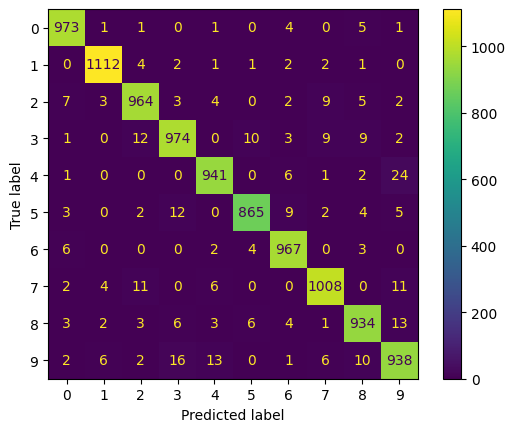

In [14]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_test_pred)